<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Green_Belt/DistribuicaoEstatistica/Gr%C3%A1fico_de_Individuais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neste Notebook, nosso objetivo é entender como aplicar o Gráfico de Individuais.

### 1 - Quais situações são recomendadas a sua utilização;
### 2 - Com quais tipos de variáveis devemos trabalhar nesse tipo de gráfico;
### 3 - Como construir o gráfico;
### 4 - Como explicar o gráfico;

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [18]:
url = 'https://github.com/moises-rb/Analise_Dados/blob/main/Green_Belt/2-Measure/DistribuicaoEstatistica/base_dados/Green_Belt_FM2S_Demo_4.xlsx?raw=True'
dados = pd.read_excel(url)
dados.head()

,Data,Quantidade produzida (kg),Estágio
0,1990-02-01,237.743019,A
1,1990-02-02,254.922399,A
2,1990-02-03,246.850588,A
3,1990-02-04,257.094066,A
4,1990-02-05,226.468559,A


In [19]:
# Aqui o Pandas "prepara" o arquivo para ver as abas
excel_file = pd.ExcelFile(url)
nomes_das_abas = excel_file.sheet_names
print(nomes_das_abas)

['GC - Var. Contínuas', 'GC - Var. Contagem', 'GC - Var. Categóricas']


In [20]:
# Lendo a primeira aba da planilha
dados_aba1 = pd.read_excel(url, sheet_name=nomes_das_abas[0]) # podemos ler assim também: dados_aba1 = pd.read_excel(url, sheet_name='Normalidade - Var. Contínuas 1')
dados_aba1.head()

,Data,Quantidade produzida (kg),Estágio
0,1990-02-01,237.743019,A
1,1990-02-02,254.922399,A
2,1990-02-03,246.850588,A
3,1990-02-04,257.094066,A
4,1990-02-05,226.468559,A


Realizando o teste (avaliação) de Normalidade para nossos dados!

Iniciando análise de normalidade por Estágio...

--- Analisando Estágio: A ---


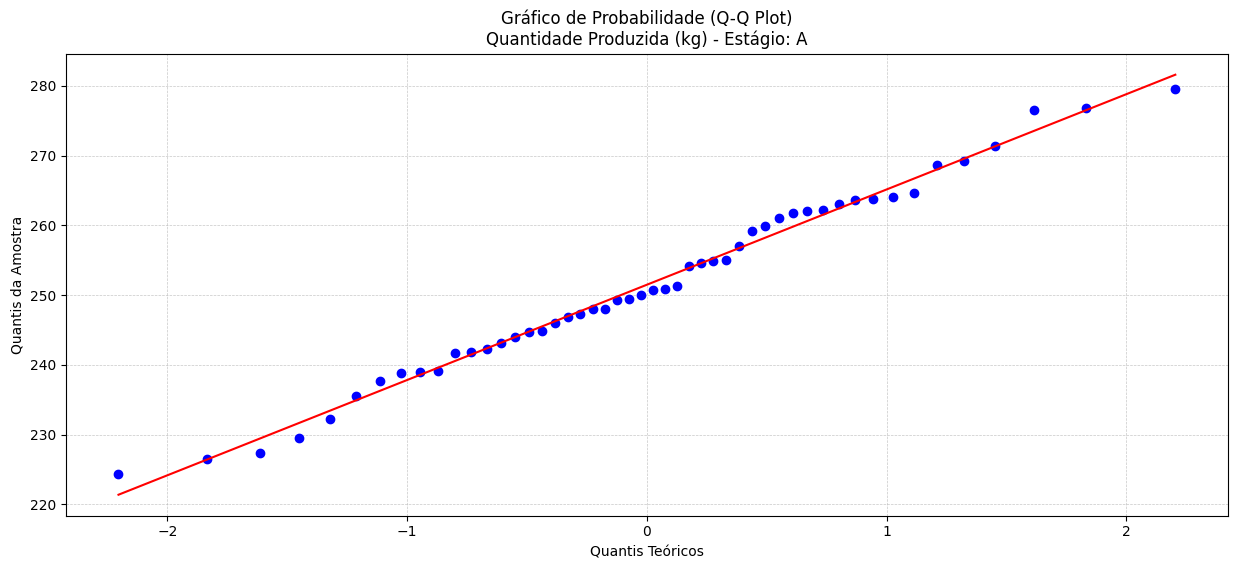

  Teste de Shapiro-Wilk para o Estágio A:
    Estatística W: 0.9855
    Valor-p: 0.7947
  Conclusão: Os dados para o Estágio A **PROVAVELMENTE seguem uma distribuição normal** (p > 0.05).
--------------------------------------------------

--- Analisando Estágio: B ---


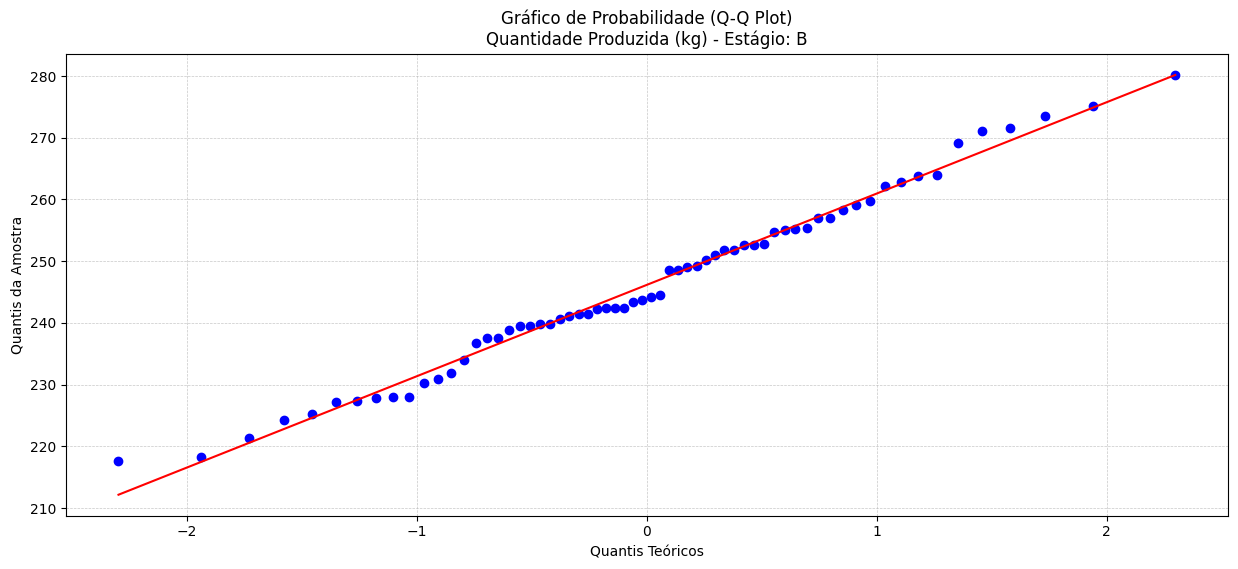

  Teste de Shapiro-Wilk para o Estágio B:
    Estatística W: 0.9857
    Valor-p: 0.6650
  Conclusão: Os dados para o Estágio B **PROVAVELMENTE seguem uma distribuição normal** (p > 0.05).
--------------------------------------------------



In [21]:
# --- Lógica de Análise por Estágio ---

# Encontra todos os estágios únicos na sua coluna 'Estagio'
estagios_disponiveis = dados_aba1['Estágio'].unique()

print("Iniciando análise de normalidade por Estágio...\n")

for estagio_atual in estagios_disponiveis:
    print(f"--- Analisando Estágio: {estagio_atual} ---")

    # Filtra o DataFrame para pegar apenas os dados do estágio atual
    # E seleciona a coluna 'Quantidade produzida (kg)'
    # E remove quaisquer valores NaN dela
    dados_para_analisar_no_estagio = dados_aba1[
        dados_aba1['Estágio'] == estagio_atual
    ]['Quantidade produzida (kg)'].dropna()

    # Verifica se há dados suficientes para analisar (pelo menos 3 pontos para probplot)
    if len(dados_para_analisar_no_estagio) < 3:
        print(f"  Não há dados suficientes ({len(dados_para_analisar_no_estagio)} pontos) para gerar o Q-Q Plot para o Estágio {estagio_atual}. Pulando...")
        print("-" * 50 + "\n")
        continue

    # Gerando o gráfico de probabilidade (Q-Q Plot)
    fig, ax = plt.subplots(figsize=(15, 6))

    # A "mágica" que faz o gráfico!
    stats.probplot(dados_para_analisar_no_estagio, dist="norm", plot=ax)

    # Adicionando um título específico para cada estágio
    ax.set_title(f'Gráfico de Probabilidade (Q-Q Plot)\nQuantidade Produzida (kg) - Estágio: {estagio_atual}')
    ax.set_xlabel('Quantis Teóricos') # Rótulo padrão para Q-Q Plot
    ax.set_ylabel('Quantis da Amostra') # Rótulo padrão para Q-Q Plot

    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7) # Coloca as grades
    plt.show() # Mostra o desenho!

    # --- Teste de Shapiro-Wilk ---
    # Realizando o teste estatístico de normalidade
    stat_shapiro, p_shapiro = stats.shapiro(dados_para_analisar_no_estagio)
    print(f"  Teste de Shapiro-Wilk para o Estágio {estagio_atual}:")
    print(f"    Estatística W: {stat_shapiro:.4f}")
    print(f"    Valor-p: {p_shapiro:.4f}")

    if p_shapiro > 0.05:
        print(f"  Conclusão: Os dados para o Estágio {estagio_atual} **PROVAVELMENTE seguem uma distribuição normal** (p > 0.05).")
    else:
        print(f"  Conclusão: Os dados para o Estágio {estagio_atual} **NÃO seguem uma distribuição normal** (p <= 0.05).")

    print("-" * 50 + "\n") # Separador para o próximo estágio